<a href="https://colab.research.google.com/github/danm00nster/PW_ML_PROJECT/blob/main/ML_Daniel_Kwiecinski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
!git clone https://github.com/danm00nster/PW_ML_PROJECT

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix



fatal: destination path 'PW_ML_PROJECT' already exists and is not an empty directory.


In [120]:
AirlinesDF=pd.read_csv('PW_ML_PROJECT/Airlines.csv')

In [121]:
AirlinesDF.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [122]:
AirlinesDF.drop(columns=['id','AirportFrom','AirportTo'], inplace=True)

In [123]:
AirlinesDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Flight,539383.0,2427.928630,2067.429837,1.0,712.0,1809.0,3745.0,7814.0
DayOfWeek,539383.0,3.929668,1.914664,1.0,2.0,4.0,5.0,7.0
Time,539383.0,802.728963,278.045911,10.0,565.0,795.0,1035.0,1439.0
Length,539383.0,132.202007,70.117016,0.0,81.0,115.0,162.0,655.0
Delay,539383.0,0.445442,0.497015,0.0,0.0,0.0,1.0,1.0


In [124]:
AirlinesDF.head()


,Airline,Flight,DayOfWeek,Time,Length,Delay
0,CO,269,3,15,205,1
1,US,1558,3,15,222,1
2,AA,2400,3,20,165,1
3,AA,2466,3,20,195,1
4,AS,108,3,30,202,0


In [125]:
for col in ['Airline','Flight', 'DayOfWeek', 'Time', 'Length']:
    AirlinesDF[col] = AirlinesDF[col].astype('category')

In [126]:
AirlinesDF=pd.get_dummies(AirlinesDF,columns=['Airline'],drop_first=False)

In [127]:
AirlinesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Flight      539383 non-null  category
 1   DayOfWeek   539383 non-null  category
 2   Time        539383 non-null  category
 3   Length      539383 non-null  category
 4   Delay       539383 non-null  int64   
 5   Airline_9E  539383 non-null  uint8   
 6   Airline_AA  539383 non-null  uint8   
 7   Airline_AS  539383 non-null  uint8   
 8   Airline_B6  539383 non-null  uint8   
 9   Airline_CO  539383 non-null  uint8   
 10  Airline_DL  539383 non-null  uint8   
 11  Airline_EV  539383 non-null  uint8   
 12  Airline_F9  539383 non-null  uint8   
 13  Airline_FL  539383 non-null  uint8   
 14  Airline_HA  539383 non-null  uint8   
 15  Airline_MQ  539383 non-null  uint8   
 16  Airline_OH  539383 non-null  uint8   
 17  Airline_OO  539383 non-null  uint8   
 18  Airline_UA  539383 non-n

In [128]:
y=AirlinesDF.pop("Delay")

In [129]:
X=AirlinesDF


In [130]:
X.describe()


,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,0.038351,0.084645,0.021267,0.033579,0.039152,0.112981,0.051880,0.011969,0.038613,0.010341,0.067865,0.023416,0.093169,0.051205,0.063962,0.174453,0.057707,0.025446
std,0.192043,0.278353,0.144273,0.180143,0.193957,0.316570,0.221784,0.108747,0.192670,0.101166,0.251514,0.151220,0.290670,0.220415,0.244685,0.379499,0.233188,0.157475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Flight      539383 non-null  category
 1   DayOfWeek   539383 non-null  category
 2   Time        539383 non-null  category
 3   Length      539383 non-null  category
 4   Airline_9E  539383 non-null  uint8   
 5   Airline_AA  539383 non-null  uint8   
 6   Airline_AS  539383 non-null  uint8   
 7   Airline_B6  539383 non-null  uint8   
 8   Airline_CO  539383 non-null  uint8   
 9   Airline_DL  539383 non-null  uint8   
 10  Airline_EV  539383 non-null  uint8   
 11  Airline_F9  539383 non-null  uint8   
 12  Airline_FL  539383 non-null  uint8   
 13  Airline_HA  539383 non-null  uint8   
 14  Airline_MQ  539383 non-null  uint8   
 15  Airline_OH  539383 non-null  uint8   
 16  Airline_OO  539383 non-null  uint8   
 17  Airline_UA  539383 non-null  uint8   
 18  Airline_US  539383 non-n

In [132]:
X.head()

,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,Airline_FL,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV
0,269,3,15,205,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1558,3,15,222,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2400,3,20,165,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2466,3,20,195,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,108,3,30,202,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)
y_train.value_counts()

0    224339
1    180198
Name: Delay, dtype: int64

In [134]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [135]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

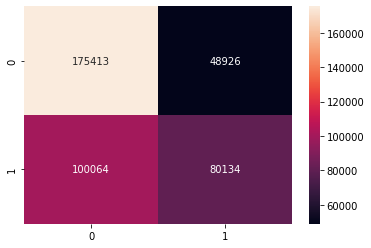

In [136]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)

precision_train = precision_score(y_train, y_pred_train, average = 'weighted')
recall_train = recall_score(y_train, y_pred_train, average= 'weighted')
f1_train = f1_score(y_train,y_pred_train,average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1score: {f1_train}')

Accuracy: 0.631702415353849
Precision: 0.629698044938166
Recall: 0.631702415353849
F1score: 0.6200930440263028


In [138]:
from sklearn.preprocessing import Normalizer, StandardScaler
normalizer = Normalizer()
standarizer = StandardScaler()
preprocessor = standarizer

def preprocess_data(X, preprocessor=None):
    if preprocessor is not None:
        preprocessor.fit(X)
        X_preprocessed = X.copy()
        X_preprocessed[:] = preprocessor.transform(X.values)
        X = X_preprocessed
    return X

X = preprocess_data(X, standarizer)
X.describe()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,Airline_FL,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV
count,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,...,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05,5.393830e+05
mean,-1.949641e-17,-1.770485e-16,-6.238851e-17,3.266966e-18,-1.022244e-17,9.906284e-18,4.900449e-18,-4.605368e-17,1.514924e-17,1.817909e-17,...,-4.268133e-17,5.996464e-17,5.780422e-17,-2.160413e-17,1.338402e-17,-7.556176e-17,1.159246e-18,-2.423878e-17,6.955476e-18,-3.951975e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.173888e+00,-1.530122e+00,-2.851075e+00,-1.885450e+00,-1.997015e-01,-3.040923e-01,-1.474076e-01,-1.864024e-01,-2.018601e-01,-3.568914e-01,...,-2.004082e-01,-1.022228e-01,-2.698249e-01,-1.548453e-01,-3.205336e-01,-2.323106e-01,-2.614052e-01,-4.596935e-01,-2.474685e-01,-1.615863e-01
25%,-8.299823e-01,-1.007837e+00,-8.549997e-01,-7.302372e-01,-1.997015e-01,-3.040923e-01,-1.474076e-01,-1.864024e-01,-2.018601e-01,-3.568914e-01,...,-2.004082e-01,-1.022228e-01,-2.698249e-01,-1.548453e-01,-3.205336e-01,-2.323106e-01,-2.614052e-01,-4.596935e-01,-2.474685e-01,-1.615863e-01
50%,-2.993713e-01,3.673348e-02,-2.779746e-02,-2.453331e-01,-1.997015e-01,-3.040923e-01,-1.474076e-01,-1.864024e-01,-2.018601e-01,-3.568914e-01,...,-2.004082e-01,-1.022228e-01,-2.698249e-01,-1.548453e-01,-3.205336e-01,-2.323106e-01,-2.614052e-01,-4.596935e-01,-2.474685e-01,-1.615863e-01
75%,6.370579e-01,5.590187e-01,8.353701e-01,4.249756e-01,-1.997015e-01,-3.040923e-01,-1.474076e-01,-1.864024e-01,-2.018601e-01,-3.568914e-01,...,-2.004082e-01,-1.022228e-01,-2.698249e-01,-1.548453e-01,-3.205336e-01,-2.323106e-01,-2.614052e-01,-4.596935e-01,-2.474685e-01,-1.615863e-01
max,2.605204e+00,1.603589e+00,2.288369e+00,7.456086e+00,5.007473e+00,3.288475e+00,6.783911e+00,5.364739e+00,4.953926e+00,2.801973e+00,...,4.989815e+00,9.782550e+00,3.706107e+00,6.458056e+00,3.119797e+00,4.304581e+00,3.825479e+00,2.175362e+00,4.040918e+00,6.188643e+00


In [139]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [140]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [141]:
ccuracy_train = accuracy_score(y_train, y_pred_train)

precision_train = precision_score(y_train, y_pred_train, average = 'weighted')
recall_train = recall_score(y_train, y_pred_train, average= 'weighted')
f1_train = f1_score(y_train,y_pred_train,average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1score: {f1_train}')

Accuracy: 0.631702415353849
Precision: 0.629698044938166
Recall: 0.631702415353849
F1score: 0.6200930440263028
